In [1]:
# the following line will install pandas if not already installed
!pip install pandas

# the following line is used to allow plotting inside the .ipynb file
%matplotlib inline

# Data

We start by loading the Wind speed data into Python and convert the column Newdate into date format.

In [5]:
import pandas as pd

site1 = pd.read_csv("../../data/week2/windspeed.csv", parse_dates=['Newdate'])
site1.head()

,DateTime,WindSpeed,U,V,RH,P,T,WS,WD,Newdate,Year,Month,Day,Hour
0,01/01/2011 01:00,10.14,3.373566,-5.185395,0.005022,102321.7031,277.546997,6.186216,326.952,2011-01-01,2011,1,1,1
1,01/01/2011 02:00,10.12,1.926434,-5.926662,0.004975,102365.1875,277.406067,6.231892,341.993,2011-01-01,2011,1,1,2
2,01/01/2011 03:00,8.94,0.625309,-6.506193,0.004870,102432.4219,277.108398,6.536173,354.510,2011-01-01,2011,1,1,3
3,01/01/2011 04:00,9.53,-0.294136,-6.760742,0.004642,102493.9609,276.832886,6.767137,2.491,2011-01-01,2011,1,1,4
4,01/01/2011 05:00,11.68,-0.551288,-6.811029,0.004435,102540.0000,276.397736,6.833304,4.627,2011-01-01,2011,1,1,5


We can now plot the data (we’ll use the formula notation y~x to specify what which variables to use for the x and y axes).

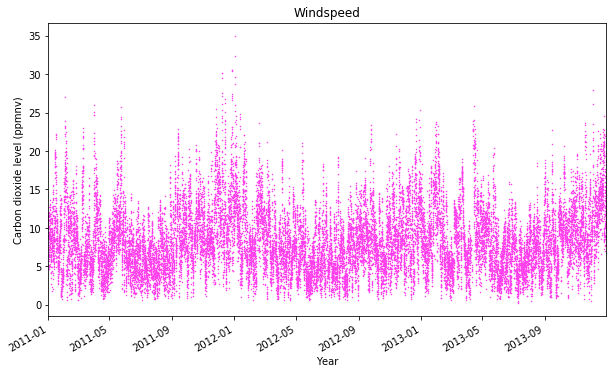

In [21]:
ax = site1.plot(x='Newdate', y='WindSpeed', style='s', ms=0.5, c='#FE40ED', 
           figsize=(10,6), title='Windspeed', legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Wind Speed");

To reduce the clutter we can calculate the average wind speed for every day. This can be done very efficiently using the function aggregate.
The function `mean_not_ignoring_nans` is created to match the default behaviour of the R code for comparison

In [34]:
mean_not_ignoring_nans = lambda x: x.mean(skipna=False)

agg_mean = site1.groupby(pd.Grouper(key='Newdate', freq='D')).agg(mean_not_ignoring_nans)['WindSpeed']
agg_mean.head(6)

Newdate
2011-01-01    10.686957
2011-01-02     7.667917
2011-01-03          NaN
2011-01-04          NaN
2011-01-05     8.376667
2011-01-06     8.535417
Freq: D, Name: WindSpeed, dtype: float64

We can now plot the daily average wind speed as a line

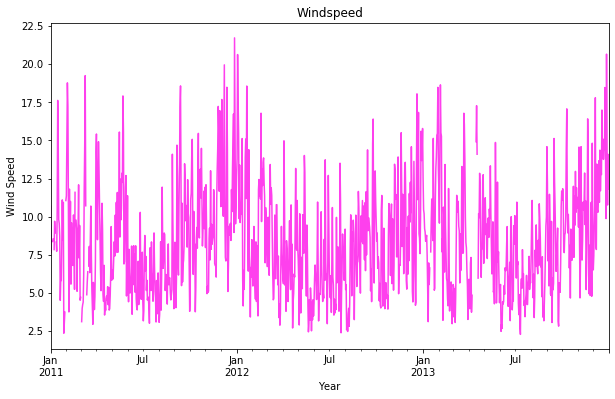

In [35]:
ax = agg_mean.plot(x='Newdate', y='WindSpeed', style='-', c='#FE40ED', 
           figsize=(10,6), title='Windspeed', legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Wind Speed");